In [1]:
import numpy as np
import pandas as pd


In [2]:
dataset = pd.read_csv('../Data/svmdata.csv')
train, validate, test = np.split(dataset.sample(frac=1), [int(.6*len(dataset)), int(.8*len(dataset))])

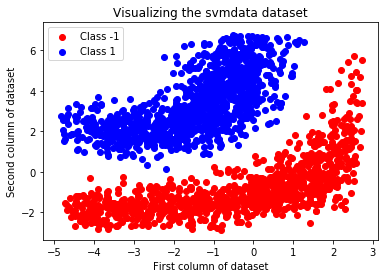

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

red = train.values[train.values[:, -1] == -1]
blue = train.values[train.values[:, -1] == 1]

plt.scatter(red[:, 0], red[:, 1], color='red', label='Class -1')
plt.scatter(blue[:, 0], blue[:, 1], color='blue', label='Class 1')
plt.xlabel('First column of dataset')
plt.ylabel('Second column of dataset')
plt.title('Visualizing the svmdata dataset')
plt.legend()

Best_c:  0.049999999999999996


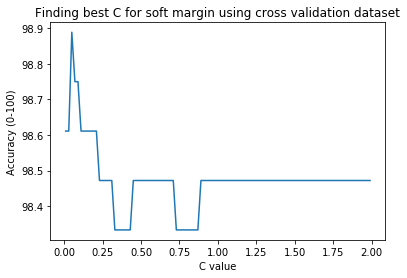

In [37]:
from sklearn.svm import LinearSVC
from sklearn import metrics

Cs = np.arange(0.01, 2, .02)
accuracies = []
for c in Cs:
    classifier = LinearSVC(C=c, max_iter=10000)
    classifier.fit(train.values[:, :-1], train.values[:, -1])
    predictions = classifier.predict(validate.values[:, :-1])
    accuracy = metrics.accuracy_score(predictions, validate.values[:, -1])
    accuracies.append(accuracy*100)
    
plt.plot(Cs, accuracies)
plt.xlabel('C value')
plt.ylabel('Accuracy (0-100)')
plt.title('Finding best C for soft margin using cross validation dataset')

best_c = Cs[accuracies == max(accuracies)][0]
print('Best_c: ', best_c)

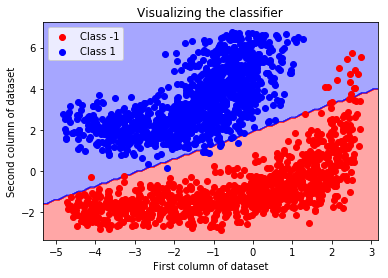

In [44]:
from matplotlib import colors

classifier = LinearSVC(C=best_c, max_iter=10000)
classifier.fit(train.values[:, :-1], train.values[:, -1])

xmin = min(min(red[:, 0]), min(blue[:, 0])) - .5
xmax = max(max(red[:, 0]), max(blue[:, 0])) + .5
ymin = min(min(red[:, 1]), min(blue[:, 1])) - .5
ymax = max(max(red[:, 1]), max(blue[:, 1])) + .5

colormap = colors.ListedColormap(['r', 'b'])
bounds = [-2, 0, 2]
norms = colors.BoundaryNorm(bounds, colormap.N)

xx, yy = np.meshgrid(np.arange(xmin, xmax, .1), np.arange(ymin, ymax, .1))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=colormap, norm=norms, alpha=0.35)

plt.scatter(red[:, 0], red[:, 1], color='red', label='Class -1')
plt.scatter(blue[:, 0], blue[:, 1], color='blue', label='Class 1')
plt.xlabel('First column of dataset')
plt.ylabel('Second column of dataset')
plt.title('Visualizing the classifier')
plt.legend()

In [46]:
predictions = classifier.predict(test.values[:, :-1])
print('Accuracy of the classifier: ', metrics.accuracy_score(predictions, test.values[:, -1]))

Accuracy of the classifier:  0.9888888888888889


In [58]:
dataset = pd.read_csv('../Data/svmdata2.csv')
train, test = np.split(dataset.sample(frac=1), [int(.7*len(dataset))])

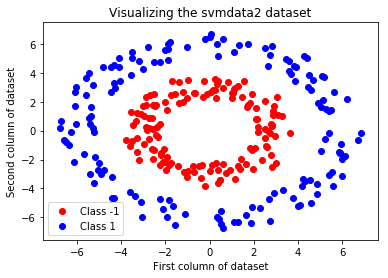

In [59]:
red = train.values[train.values[:, -1] == -1]
blue = train.values[train.values[:, -1] == 1]

plt.scatter(red[:, 0], red[:, 1], color='red', label='Class -1')
plt.scatter(blue[:, 0], blue[:, 1], color='blue', label='Class 1')
plt.xlabel('First column of dataset')
plt.ylabel('Second column of dataset')
plt.title('Visualizing the svmdata2 dataset')
plt.legend()

In [65]:
def transform(data):
    new_data = data[:, :-1]
    new_data = np.square(new_data)
    transformation = np.array([1, 1])
    return np.column_stack((np.matmul(new_data, transformation), data[:, -1]))


train_mat = transform(train.values)
test_mat = transform(test.values)

Text(0.5, 1.0, 'Transformed dataset')

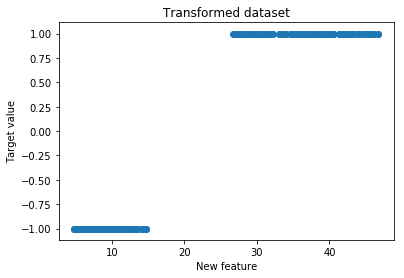

In [67]:
plt.scatter(test_mat[:, 0], test_mat[:, 1])
plt.xlabel('New feature')
plt.ylabel('Target value')
plt.title('Transformed dataset')

In [74]:
classifier = LinearSVC()
classifier.fit(train.values[:, :-1], train.values[:, -1])
predictions = classifier.predict(test.values[:, :-1])
accuracy = metrics.accuracy_score(predictions, test.values[:, -1])
print('Accuracy on original dataset: ', accuracy)

Accuracy on original dataset:  0.425


In [81]:
classifier = LinearSVC(max_iter=100000)
classifier.fit(train_mat[:, :-1], train_mat[:, -1])
predictions = classifier.predict(test_mat[:, :-1])
accuracy = metrics.accuracy_score(predictions, test_mat[:, -1])
print('Accuracy on transformed dataset: ', accuracy)


Accuracy on transformed dataset:  1.0
